In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import plotly.express as px


In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

### DATA EXPLORATION

In [3]:
data = pd.read_csv('/kaggle/input/data-rev/output.csv')
data.head()

,label,text
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...


In [4]:
# Check the column names
print(data.columns)

Index([' label', 'text'], dtype='object')


In [5]:
data = data[['text', ' label']] # features needed

In [6]:
#Basic statistics:
print(data.describe())

                                                     text     label
count                                               99999     99999
unique                                              99999         3
top     ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...  Positive
freq                                                    1     33333


In [7]:
#number of classes:
data[' label'].unique()

array(['Positive', 'Mixed', 'Negative'], dtype=object)

In [8]:
print('general Information of the dataset')
data.info()

general Information of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    99999 non-null  object
 1    label  99999 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [9]:
print('checking for missing values')
data.isna().any()

checking for missing values


text      False
 label    False
dtype: bool

In [10]:
print(' class count ')
data[" label"].value_counts()

 class count 


 label
Positive    33333
Mixed       33333
Negative    33333
Name: count, dtype: int64

In [11]:
print(' Number of words')
wordsCount =  ' '.join(data['text'].values)
print(f"The number of words in the Dataset: {len(wordsCount.split())} ")

 Number of words
The number of words in the Dataset: 5502546 


In [12]:
print(' Number of unique words ')
UniqueWords= set(wordsCount.lower().split())
print(f"The number of unique words in the Dataset: {len(UniqueWords)}")

 Number of unique words 
The number of unique words in the Dataset: 418549


### DATA REPRESENTATION 

<Axes: xlabel=' label'>

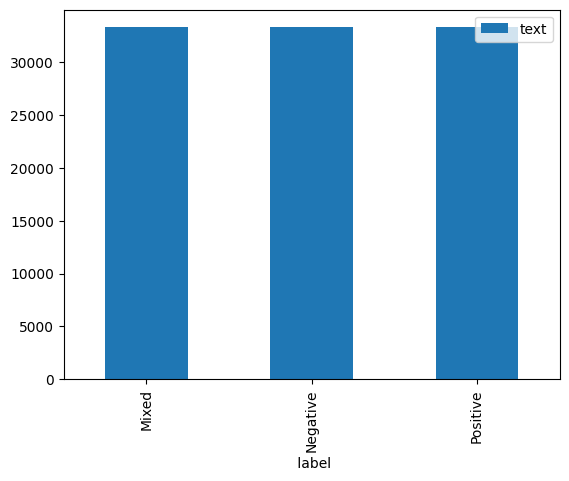

In [13]:
# The distribution of sentiments
data.groupby(' label').count().plot(kind='bar')

In [14]:
fig = px.pie(data, names=' label', title ='Pie chart of 100k reviews')
fig.show()

### REMOVE STOP WORDS 

In [15]:
# Get the list of stopwords
stop_words = set(stopwords.words('arabic'))

# Function to remove stop words from a text
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# Apply stop word removal to the 'text' column
data['text_without_stopwords'] = data['text'].apply(remove_stopwords)

In [16]:
data.head()

,text,label,text_without_stopwords
0,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...,Positive,ممتاز نوعا . النظافة والموقع والتجهيز والشاطيء...
1,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...,Positive,أسباب نجاح الإمارات شخص الدولة يعشق ترابها . ن...
2,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...,Positive,هادفة .. وقوية . تنقلك صخب شوارع القاهرة الى ه...
3,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...,Positive,ياسات جلوريا جزء يتجزأ دبي . فندق متكامل الخدم...


### TOKENIZATION

In [17]:
# Tokenize the text column
data['tokenized_text'] = data['text_without_stopwords'].apply(word_tokenize)

In [18]:
data.head()

,text,label,text_without_stopwords,tokenized_text
0,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...,Positive,ممتاز نوعا . النظافة والموقع والتجهيز والشاطيء...,"[ممتاز, نوعا, ., النظافة, والموقع, والتجهيز, و..."
1,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...,Positive,أسباب نجاح الإمارات شخص الدولة يعشق ترابها . ن...,"[أسباب, نجاح, الإمارات, شخص, الدولة, يعشق, ترا..."
2,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...,Positive,هادفة .. وقوية . تنقلك صخب شوارع القاهرة الى ه...,"[هادفة, .., وقوية, ., تنقلك, صخب, شوارع, القاه..."
3,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...,"[خلصنا, .., مبدئيا, اللي, مستني, ابهار, زي, ال..."
4,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...,Positive,ياسات جلوريا جزء يتجزأ دبي . فندق متكامل الخدم...,"[ياسات, جلوريا, جزء, يتجزأ, دبي, ., فندق, متكا..."


STEMMING

In [19]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import ISRIStemmer
import nltk

stemmer = ISRIStemmer()

def stem_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        stemmed_tokens = [stemmer.stem(token) for token in tokens]
        return ' '.join(stemmed_tokens)
    else:
        return ''  

# Apply the stemming function to the 'tokenized_text' column
data['stemmed_tokenized_text'] = data['text_without_stopwords'].apply(stem_text)

In [20]:
data.head()

,text,label,text_without_stopwords,tokenized_text,stemmed_tokenized_text
0,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...,Positive,ممتاز نوعا . النظافة والموقع والتجهيز والشاطيء...,"[ممتاز, نوعا, ., النظافة, والموقع, والتجهيز, و...",متز نوع . نظف وقع جهز شاطيء . طعم
1,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...,Positive,أسباب نجاح الإمارات شخص الدولة يعشق ترابها . ن...,"[أسباب, نجاح, الإمارات, شخص, الدولة, يعشق, ترا...",سبب نجح امر شخص دول عشق ترب . نحب امر . ومض فك...
2,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...,Positive,هادفة .. وقوية . تنقلك صخب شوارع القاهرة الى ه...,"[هادفة, .., وقوية, ., تنقلك, صخب, شوارع, القاه...",هدف .. وقي . نقل صخب شرع قهر الى هدء جبل شيش ....
3,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...,"[خلصنا, .., مبدئيا, اللي, مستني, ابهار, زي, ال...",خلص .. بدئ الل مست بهر زي فيل زرق ميقراش حسن.....
4,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...,Positive,ياسات جلوريا جزء يتجزأ دبي . فندق متكامل الخدم...,"[ياسات, جلوريا, جزء, يتجزأ, دبي, ., فندق, متكا...",ياس جلر جزء جزأ دبي . ندق كامل خدم ريح نفس . وجد


CONVERT LABELS TO NUMBERS 

In [21]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['label_encoded'] = encoder.fit_transform(data[' label'])


In [22]:
data['label_encoded'].head()

0    2
1    2
2    2
3    2
4    2
Name: label_encoded, dtype: int64

### BAG OF WORDS 

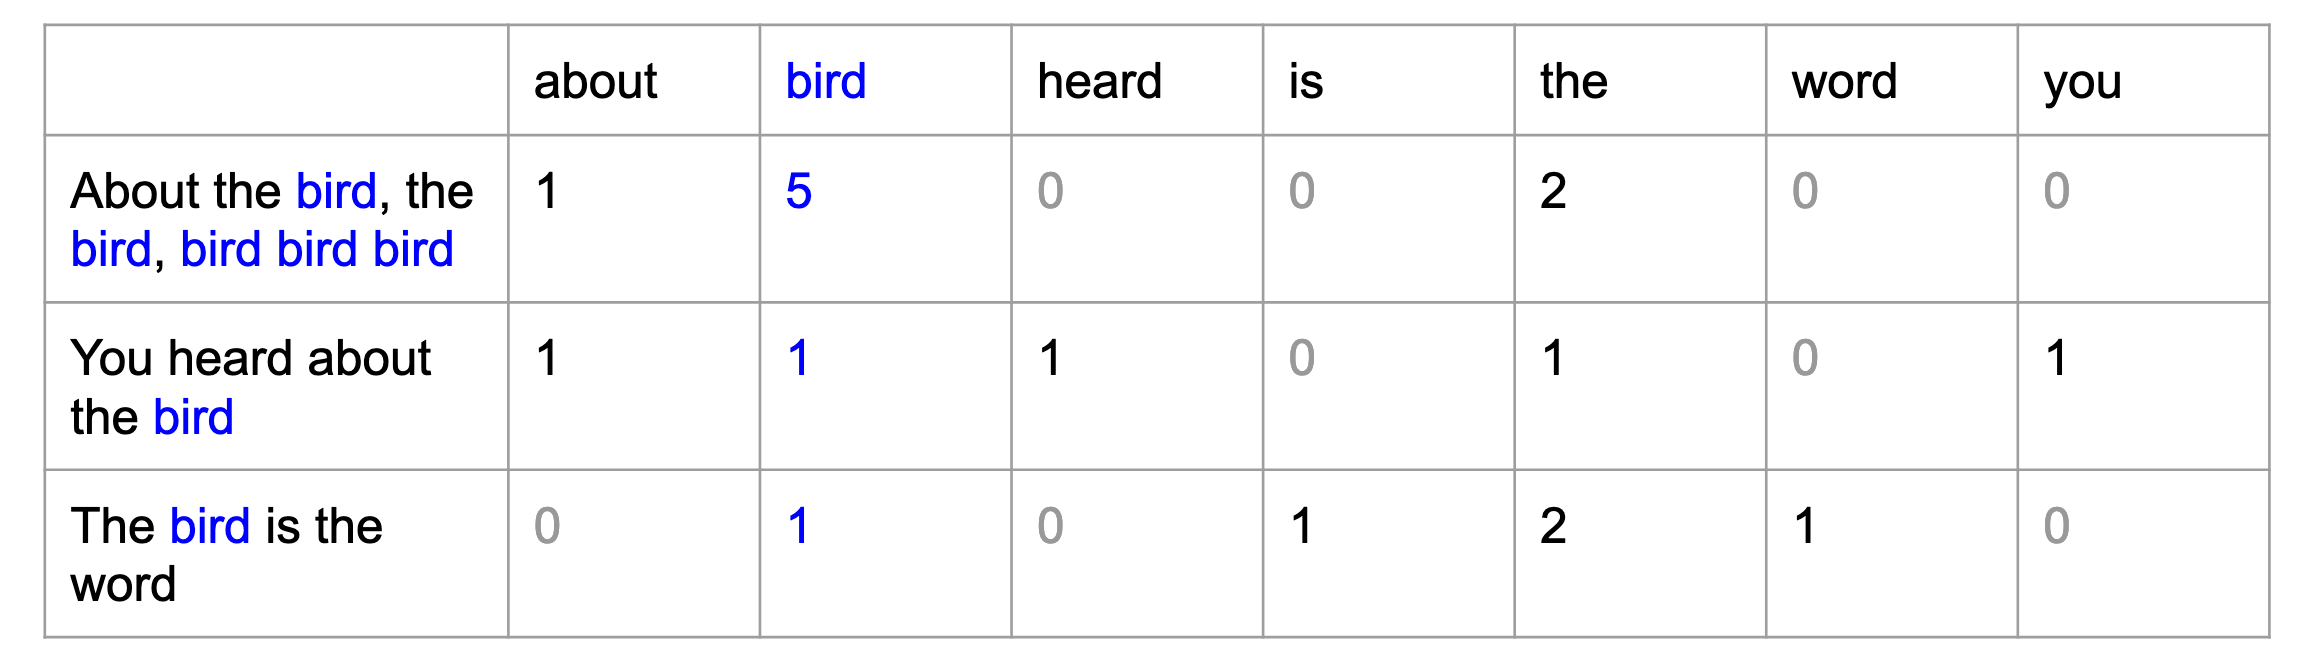

In [23]:
data['joined_tokenized_text'] = data['tokenized_text'].apply(lambda x: " ".join(x))

In [24]:
# Create a CountVectorizer to convert text into a bag-of-words representation
vectorizer = CountVectorizer(max_features=None)
X = vectorizer.fit_transform(data['stemmed_tokenized_text'])
#X = vectorizer.fit_transform(data['joined_tokenized_text'])
y=data['label_encoded']

In [25]:
vectorizer.vocabulary_

{'متز': 61197,
 'نوع': 71253,
 'نظف': 70675,
 'وقع': 79931,
 'جهز': 20214,
 'شاطيء': 34652,
 'طعم': 39498,
 'سبب': 32724,
 'نجح': 69896,
 'امر': 9349,
 'شخص': 35074,
 'دول': 27367,
 'عشق': 42275,
 'ترب': 15499,
 'نحب': 70008,
 'ومض': 81392,
 'فكر': 47291,
 'نصح': 70399,
 'لدل': 56637,
 'طمح': 39808,
 'صفف': 37543,
 'ولى': 80575,
 'قئد': 48224,
 'قبل': 48537,
 'برح': 12408,
 'شعب': 35527,
 'وفر': 79709,
 'سب': 32696,
 'عيش': 43768,
 'كرم': 52588,
 'حكم': 22928,
 'وقف': 79939,
 'لكل': 57372,
 'فرد': 46771,
 'فين': 48096,
 'جرد': 19278,
 'كتب': 51708,
 'سيس': 34291,
 'كنت': 54259,
 'عقد': 42672,
 'سحق': 32958,
 'قرء': 49007,
 'رات': 28642,
 'كثر': 52002,
 'هدف': 72630,
 'وقي': 79982,
 'نقل': 70967,
 'صخب': 36977,
 'شرع': 35320,
 'قهر': 50170,
 'الى': 9191,
 'هدء': 72593,
 'جبل': 18363,
 'شيش': 36460,
 'عرف': 41987,
 'حقق': 22797,
 'جرى': 19338,
 'فى': 47945,
 'بلد': 13541,
 'حرب': 21951,
 'ضرب': 38373,
 'بحق': 12077,
 'سلم': 33549,
 'جزء': 19379,
 'كبر': 51473,
 'ارخ': 5097,
 'نطق': 70475

### SPLITTING DATA 

In [26]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [27]:
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 69999
Validation set size: 15000
Test set size: 15000


### Building models 

* using BOW

In [28]:
# Train a Multinomial Naive Bayes classifier
model = MultinomialNB(alpha=2.0)
model.fit(X_train, y_train)

MultinomialNB(alpha=2.0)

In [29]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 20folds
cv_scores = cross_val_score(model, X, y, cv=20)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.6112     0.613      0.6076     0.6166     0.6138     0.6212
 0.6206     0.6052     0.6182     0.601      0.6164     0.612
 0.61       0.6154     0.6108     0.6066     0.6148     0.6042
 0.6136     0.60732146]
Mean CV score: 0.6119760732146431


In [30]:
train_score = model.score(X_train, y_train)
print(f"training accuracy: {train_score:.2f}")
val_score = model.score(X_val, y_val)
print(f"Validation accuracy: {val_score:.2f}")
test_score = model.score(X_test, y_test)
print(f"Test accuracy: {test_score:.2f}")

training accuracy: 0.69
Validation accuracy: 0.61
Test accuracy: 0.61


In [31]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 2, 2])

In [32]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6143333333333333


In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.55      0.48      0.51      5091
           1       0.62      0.72      0.67      5059
           2       0.67      0.65      0.66      4850

    accuracy                           0.61     15000
   macro avg       0.61      0.62      0.61     15000
weighted avg       0.61      0.61      0.61     15000



### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression


model_lr = LogisticRegression(penalty='l1',C=0.7, solver='liblinear',max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(C=0.7, max_iter=1000, penalty='l1', solver='liblinear')

In [35]:
# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model_lr, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.62975    0.63305    0.62895    0.6298     0.62843142]
Mean CV score: 0.6299962843142157


In [36]:
train_score = model_lr.score(X_train, y_train)
print(f"training accuracy: {train_score:.2f}")
val_score = model_lr.score(X_val, y_val)
print(f"Validation accuracy: {val_score:.2f}")
test_score = model_lr.score(X_test, y_test)
print(f"Test accuracy: {test_score:.2f}")

training accuracy: 0.73
Validation accuracy: 0.62
Test accuracy: 0.63


In [37]:
y_pred = model_lr.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 2, 2])

In [38]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6307333333333334


In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.52      0.54      5091
           1       0.67      0.69      0.68      5059
           2       0.65      0.69      0.67      4850

    accuracy                           0.63     15000
   macro avg       0.63      0.63      0.63     15000
weighted avg       0.63      0.63      0.63     15000



**It seems like Logistic Regression perform much better than MultinomialNB classifer with:**
* Logistic Regression accuracy = 63
*  MultinomialNB accuracy = 61

### Term Frequency-Inverse Document Frequency (TF-IDF)

These feature names correspond to the columns of the TF-IDF matrix, where each feature name represents a unique word in the corpus.

99999 rows and 84476 columns. This typically indicates that you have 99999  samples 

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

#  TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit-transform the 'stemmed_text2' column to obtain the TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(data['stemmed_tokenized_text'])

# Print the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", X_tfidf.shape)

# Convert the TF-IDF matrix to a dense array 
X_dense = X_tfidf.toarray()

feature_names = tfidf_vectorizer.get_feature_names_out()

# Print the feature names
print("Feature names:", feature_names)


Shape of TF-IDF matrix: (99999, 84476)
Feature names: ['ءءء' 'ءءءء' 'ءأصبح' ... 'يين' 'ييي' 'يييييديم']


In [41]:
# Split the data into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [42]:
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 69999
Validation set size: 15000
Test set size: 15000


### Logistic Regression & MultinomialNB

In [43]:
# Initialize and train a logistic regression model
LR = LogisticRegression(penalty='l1',C=0.7, solver='liblinear',max_iter=1000)
LR.fit(X_train, y_train)

LogisticRegression(C=0.7, max_iter=1000, penalty='l1', solver='liblinear')

In [44]:
# Perform cross-validation with 5 folds
cv_scores = cross_val_score(LR, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.62995    0.6331     0.62895    0.6299     0.62828141]
Mean CV score: 0.6300362828141407


In [45]:
train_score = LR.score(X_train, y_train)
print(f"training accuracy: {train_score:.2f}")
val_score = LR.score(X_val, y_val)
print(f"Validation accuracy: {val_score:.2f}")
test_score = LR.score(X_test, y_test)
print(f"Test accuracy: {test_score:.2f}")


training accuracy: 0.67
Validation accuracy: 0.64
Test accuracy: 0.64


In [46]:
y_pred_lr=LR.predict(X_test)

In [47]:
print("Accuracy:",accuracy_score(y_test, y_pred_lr))

Accuracy: 0.6408666666666667


In [48]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.58      0.52      0.55      5091
           1       0.68      0.70      0.69      5059
           2       0.65      0.71      0.68      4850

    accuracy                           0.64     15000
   macro avg       0.64      0.64      0.64     15000
weighted avg       0.64      0.64      0.64     15000



In [49]:
# Train a Multinomial Naive Bayes classifier
model = MultinomialNB(alpha=2.0)
model.fit(X_train, y_train)

MultinomialNB(alpha=2.0)

In [50]:
train_score = model.score(X_train, y_train)
print(f"training accuracy: {train_score:.2f}")
val_score = model.score(X_val, y_val)
print(f"Validation accuracy: {val_score:.2f}")
test_score = model.score(X_test, y_test)
print(f"Test accuracy: {test_score:.2f}")


training accuracy: 0.71
Validation accuracy: 0.62
Test accuracy: 0.62


In [51]:
y_predNB=model.predict(X_test)

In [52]:
print("Accuracy:",accuracy_score(y_test, y_predNB))

Accuracy: 0.6235333333333334


In [53]:
print(classification_report(y_test, y_predNB))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55      5091
           1       0.66      0.68      0.67      5059
           2       0.69      0.62      0.65      4850

    accuracy                           0.62     15000
   macro avg       0.63      0.62      0.63     15000
weighted avg       0.63      0.62      0.62     15000



### for TF-IDF logistic regression also have better performance with 64 accuracy and MultinomialNB with 62 accuracy

In [54]:
X=data.stemmed_tokenized_text
y=data.label_encoded


In [55]:
#data['joined_tokenized_text'] = data['tokenized_text'].apply(lambda x: ' '.join(x))

In [56]:
X2=X#data['joined_tokenized_text']
y=data.label_encoded

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.20, random_state=10)

In [58]:
sentence_length = []
for sentence in X_train:
    sentence_length.append(len(sentence.split(' ')))
print(sentence_length[:10])

[19, 13, 37, 20, 50, 62, 18, 12, 63, 20]


In [59]:
percentiles = [0, 5, 10, 25, 50, 75, 90, 95, 99, 100]
percentiles_dict = {}
for percentil in percentiles:
    percentiles_dict[str(percentil) + "th percentil"] = np.percentile(sentence_length, percentil)
pd.DataFrame(percentiles_dict, index=["Percentiles"]).T

,Percentiles
0th percentil,1.0
5th percentil,5.0
10th percentil,7.0
25th percentil,12.0
50th percentil,23.0
75th percentil,48.0
90th percentil,100.0
95th percentil,158.0
99th percentil,361.0
100th percentil,1442.0


In [60]:
 len(vectorizer.vocabulary_)

84476

In [61]:
from keras.layers import (Conv1D,Dense,Dropout,Embedding,Flatten,GlobalMaxPooling1D,Input,LSTM,TextVectorization)
vocab_size = 84476
max_sentence_length = 47

text_vectorizer = TextVectorization(max_tokens=vocab_size,output_sequence_length=max_sentence_length)
text_vectorizer.adapt(X_train)
text_vectorizer.adapt(X_test)
vectorizerd_text = text_vectorizer(X_train)
vectorizerd_text2 = text_vectorizer(X_test)
text_vectorizer.get_config()

2024-05-07 14:56:07.180078: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 14:56:07.180234: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 14:56:07.313103: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'float32',
 'max_tokens': 84476,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 47,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 35723}

In [62]:
vocab = text_vectorizer.get_vocabulary()
vocab[:10]

['', '[UNK]', 'كتب', 'روي', 'جدا', '،', 'ندق', 'ان', 'عمل', 'وجد']

In [63]:
import random
test_sentence = random.choice(X_train)
vectorized_sentence = text_vectorizer([test_sentence])
print(test_sentence)
print(vectorized_sentence)
print(vectorized_sentence.shape)

حسن . شي عجب . وجد زعج كثر غرف صغر جدا سوي قيم يجر غرف
tf.Tensor(
[[ 152  126   34    9  176   20   10  114    4 1724  111 1778   10    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]], shape=(1, 47), dtype=int64)
(1, 47)


In [64]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((vectorizerd_text, y_train))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(32)
dataset = dataset.prefetch(8)
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.3))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))
len(train), len(val), len(test)

(1750, 750, 250)

In [65]:
n_epochs = 5   # Number of epochs.    # Size of each batch.
learn_rate = 0.02           # learning rate.

In [66]:
from keras.utils import to_categorical

# Convert integer labels to one-hot encoded format
y_one_hot = to_categorical(y, num_classes=3)
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

In [67]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Embedding, LSTM


# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=47)) 
model.add(LSTM(64, activation='tanh'))  # Add dropout here
model.add(Dense(3, activation='softmax')) 

# Compile the model with a specific learning rate
optimizer = Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [68]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(vectorizerd_text, y_train_one_hot, epochs=15, validation_data=(vectorizerd_text2, y_test_one_hot), callbacks=[early_stopping])


Epoch 1/15
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 88s 34ms/step - accuracy: 0.3652 - loss: 1.0876 - val_accuracy: 0.3435 - val_loss: 1.0984
Epoch 2/15
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 85s 34ms/step - accuracy: 0.3778 - loss: 1.0789 - val_accuracy: 0.4125 - val_loss: 1.0378
Epoch 3/15
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 141s 34ms/step - accuracy: 0.5379 - loss: 0.9375 - val_accuracy: 0.6297 - val_loss: 0.8072
Epoch 4/15
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.6769 - loss: 0.7344 - val_accuracy: 0.6471 - val_loss: 0.7657
Epoch 5/15
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.7284 - loss: 0.6265 - val_accuracy: 0.6429 - val_loss: 0.7904


In [69]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 47, 47)         │     3,970,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        28,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,997,719 (45.77 MB)

 Trainable params: 3,999,239 (15.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,998,480 (30.51 MB)

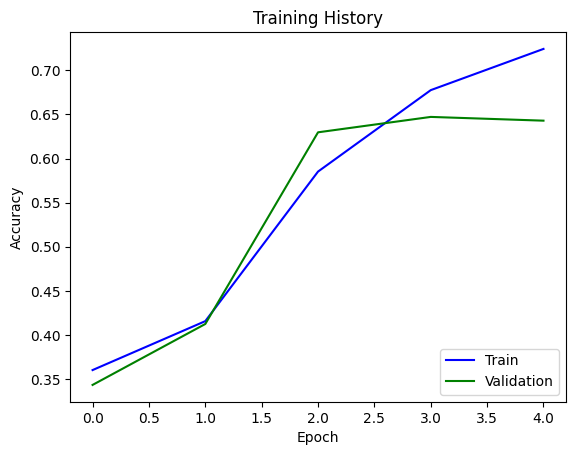

In [70]:
plt.plot(history.history['accuracy'], c="b")
plt.plot(history.history['val_accuracy'], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

<Figure size 800x500 with 0 Axes>

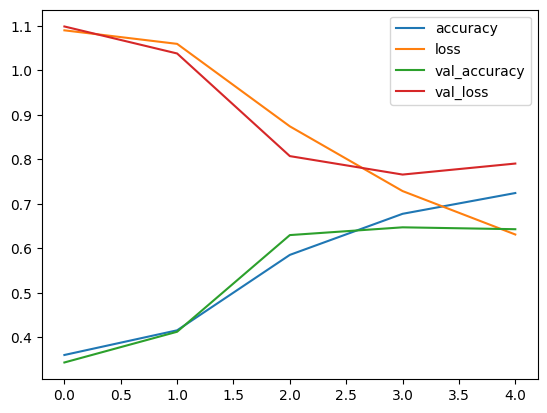

In [71]:
plt.figure(figsize=(8, 5))
pd.DataFrame(history.history).plot()
plt.show()

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step


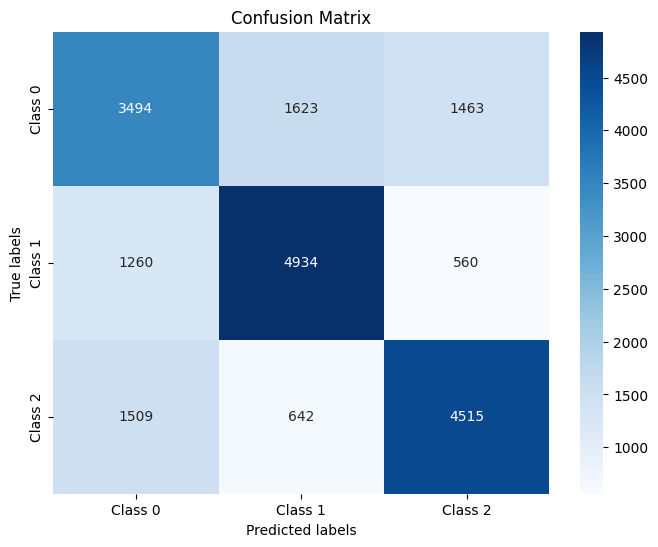

In [72]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

predictions = model.predict(vectorizerd_text2)
y_pred = np.argmax(predictions, axis=1)  # Convert one-hot encoded predictions to labels

y_true = np.argmax(y_test_one_hot, axis=1)  # Convert one-hot encoded test labels to labels

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [73]:
report = classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1', 'Class 2'])
print(report)

              precision    recall  f1-score   support

     Class 0       0.56      0.53      0.54      6580
     Class 1       0.69      0.73      0.71      6754
     Class 2       0.69      0.68      0.68      6666

    accuracy                           0.65     20000
   macro avg       0.64      0.65      0.65     20000
weighted avg       0.65      0.65      0.65     20000

